In [1]:
import os, glob, sys
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.io import fits
import numpy as np
from astropy.table import Table, vstack, hstack
from astropy import units as u
from astropy.coordinates import SkyCoord
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Plot presetting
import matplotlib.pyplot as plt
import matplotlib as mpl
#
mpl.rcParams["axes.titlesize"] = 14
mpl.rcParams["axes.labelsize"] = 20
plt.rcParams['savefig.dpi'] = 500
plt.rc('font', family='serif')

In [3]:
plt.style.use('dark_background') # Dark 모드 스타일 적용

In [4]:
inim = '../data/spss/LTT7987_deep/Calib-7DT01-LTT7987-20231015-022405-r-400.com.fits'
data, hdr = fits.getdata(inim, header=True)
data.shape

(6388, 9576)

In [5]:
intbl = Table.read('../data/spss/LTT7987_deep/test.cat', format='ascii.sextractor')
intbl[:5]

ALPHA_J2000,DELTA_J2000,NUMBER,X_IMAGE,Y_IMAGE,MAG_AUTO,MAGERR_AUTO,FLUX_AUTO,FLUXERR_AUTO,BACKGROUND,THRESHOLD,FLAGS,ELONGATION,ELLIPTICITY,CLASS_STAR,FWHM_IMAGE,FWHM_WORLD
deg,deg,,pix,pix,mag,mag,ct,ct,ct,ct,,,,,pix,deg
float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64
302.2422081,-30.6456176,1,1592.3904,125.5885,-15.9656,0.0,2433516.0,74.07177,31.75782,3.613386,0,1.035,0.034,1.0,5.43,0.0007623479
302.6641464,-30.6500826,2,4179.002,94.9983,-13.6265,0.0002,282236.4,55.96207,31.38897,3.613386,0,1.034,0.033,0.977,6.03,0.0008456468
302.7044651,-30.6504329,3,4426.1533,92.1112,-9.9554,0.0052,9597.2,45.74428,32.01908,3.613386,0,1.028,0.027,0.028,5.98,0.0008394076
302.3189265,-30.6514335,4,2062.7808,85.1007,-12.4463,0.0006,95170.48,53.48483,31.59005,3.613386,0,1.045,0.043,0.486,5.69,0.0007978289
302.6120834,-30.6527067,5,3859.835,76.6799,-13.3848,0.0003,225902.8,54.67547,31.73827,3.613386,0,1.039,0.037,0.964,6.02,0.0008437999


In [6]:
zpauto = hdr['ZP_0']

In [7]:
indx_5sig = np.where(
	(intbl['MAGERR_AUTO']<0.205) &
	(intbl['MAGERR_AUTO']>0.195)
)
depth = np.median(intbl['MAG_AUTO'][indx_5sig])+zpauto

print(len(intbl['MAG_AUTO'][indx_5sig]), np.median(intbl['MAG_AUTO'][indx_5sig])+zpauto)

358 20.5375


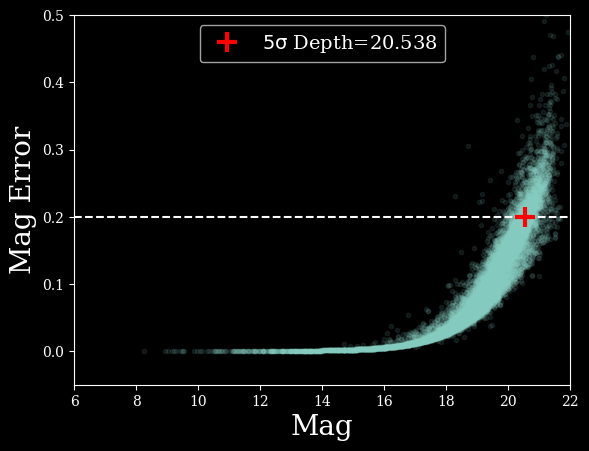

In [8]:
plt.plot(intbl['MAG_AUTO']+zpauto, intbl['MAGERR_AUTO'], '.', alpha=0.1)
plt.plot(depth, 0.2, '+', c='red', ms=14, mew=3, zorder=999, label=r'$\rm 5\sigma$ Depth='+f"{depth:.3f}")
plt.axhline(y=0.2, ls='--')
plt.xlim([6, 22])
plt.ylim([-0.05, 0.5])
plt.xlabel('Mag')
plt.ylabel('Mag Error')
plt.legend(loc='upper center', fontsize=14)

In [9]:
ysize, xsize = data.shape
xsize/4, ysize/4

xstep = xsize/8
ystep = ysize/4


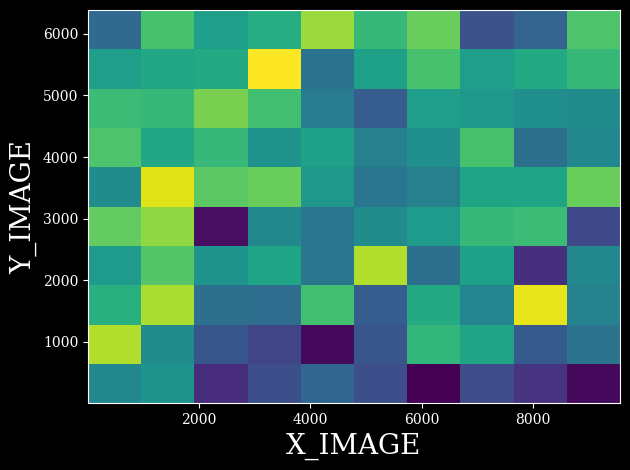

In [10]:
# plt.plot(intbl['X_IMAGE'], intbl['Y_IMAGE'], '.', alpha=0.1)
_ = plt.hist2d(intbl['X_IMAGE'], intbl['Y_IMAGE'], )
plt.xlabel('X_IMAGE')
plt.ylabel('Y_IMAGE')
plt.tight_layout()

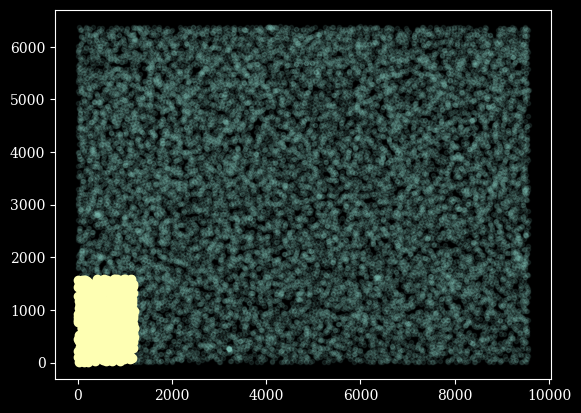

In [11]:
xx = 0
yy = 0

indx_grid = np.where(
	(intbl['X_IMAGE']<xstep*(xx+1)) & (intbl['X_IMAGE']>xstep*xx) &
	(intbl['Y_IMAGE']<ystep*(yy+1)) & (intbl['Y_IMAGE']>ystep*yy)
)

seltbl = intbl[indx_grid]

plt.plot(intbl['X_IMAGE'], intbl['Y_IMAGE'], '.', alpha=0.1)
plt.plot(seltbl['X_IMAGE'], seltbl['Y_IMAGE'], 'o')


26 20.5279


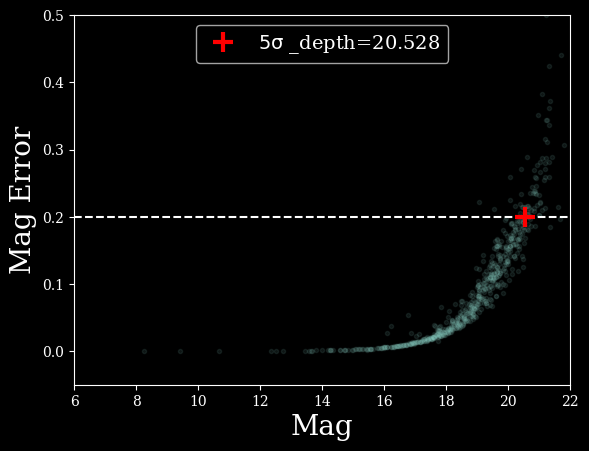

In [12]:
_indx_5sig = np.where(
	(seltbl['MAGERR_AUTO']<0.21) &
	(seltbl['MAGERR_AUTO']>0.19)
)
_depth = np.median(seltbl['MAG_AUTO'][_indx_5sig])+zpauto

print(len(seltbl['MAG_AUTO'][_indx_5sig]), np.median(seltbl['MAG_AUTO'][_indx_5sig])+zpauto)
plt.plot(seltbl['MAG_AUTO']+zpauto, seltbl['MAGERR_AUTO'], '.', alpha=0.1)
plt.plot(_depth, 0.2, '+', c='red', ms=14, mew=3, zorder=999, label=r'$\rm 5\sigma$ _depth='+f"{_depth:.3f}")
plt.axhline(y=0.2, ls='--')
plt.xlim([6, 22])
plt.ylim([-0.05, 0.5])
plt.xlabel('Mag')
plt.ylabel('Mag Error')
plt.legend(loc='upper center', fontsize=14)

# Iteration

In [13]:
xx = 0
yy = 0
nn = 0

ndata = np.zeros_like(data)

# plt.plot(intbl['X_IMAGE'], intbl['Y_IMAGE'], '.', alpha=0.1)

for xx in [0, 1, 2, 3, 4, 5, 6, 7,]:
	for yy in [0, 1, 2, 3,]:

		indx_grid = np.where(
			(intbl['X_IMAGE']<xstep*(xx+1)) & (intbl['X_IMAGE']>xstep*xx) &
			(intbl['Y_IMAGE']<ystep*(yy+1)) & (intbl['Y_IMAGE']>ystep*yy)
		)

		seltbl = intbl[indx_grid]

		# plt.plot(seltbl['X_IMAGE'], seltbl['Y_IMAGE'], 'o')

		_indx_5sig = np.where(
			(seltbl['MAGERR_AUTO']<0.21) &
			(seltbl['MAGERR_AUTO']>0.19)
			# (seltbl['MAGERR_AUTO']<0.11) &
			# (seltbl['MAGERR_AUTO']>0.09)
			# (seltbl['MAGERR_AUTO']<0.06) &
			# (seltbl['MAGERR_AUTO']>0.04)
			
		)
		_depth = np.median(seltbl['MAG_AUTO'][_indx_5sig])+zpauto
		ndata[int(ystep*yy):int(ystep*(yy+1)),int(xstep*xx):int(xstep*(xx+1))] = _depth
		print(f"[{nn}] depth={_depth:.3f} ({len(seltbl[_indx_5sig])})")
		nn += 1

[0] depth=20.528 (26)
[1] depth=20.546 (26)
[2] depth=20.605 (30)
[3] depth=20.385 (18)
[4] depth=20.470 (23)
[5] depth=20.558 (33)
[6] depth=20.671 (24)
[7] depth=20.559 (24)
[8] depth=20.366 (11)
[9] depth=20.497 (17)
[10] depth=20.529 (28)
[11] depth=20.627 (17)
[12] depth=20.367 (17)
[13] depth=20.527 (18)
[14] depth=20.595 (23)
[15] depth=20.582 (25)
[16] depth=20.466 (11)
[17] depth=20.484 (27)
[18] depth=20.547 (23)
[19] depth=20.569 (24)
[20] depth=20.451 (19)
[21] depth=20.522 (22)
[22] depth=20.597 (28)
[23] depth=20.515 (28)
[24] depth=20.430 (17)
[25] depth=20.495 (24)
[26] depth=20.565 (31)
[27] depth=20.665 (19)
[28] depth=20.493 (19)
[29] depth=20.514 (27)
[30] depth=20.478 (26)
[31] depth=20.427 (25)


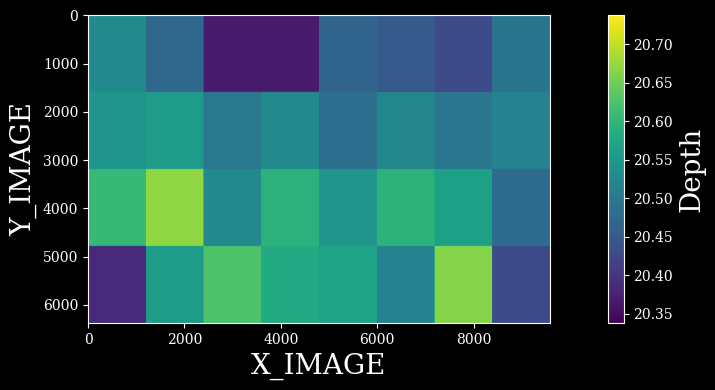

In [14]:
fig = plt.figure(figsize=(12, 4))
plt.imshow(ndata, vmin=depth-0.2, vmax=depth+0.2)
cbar = plt.colorbar()
cbar.set_label('Depth')
plt.xlabel('X_IMAGE')
plt.ylabel('Y_IMAGE')
plt.tight_layout()

# Sky Sigma

In [51]:
pixscale = 0.505

ysize, xsize = data.shape
xsize/4, ysize/4

# xstep = xsize/8
# ystep = ysize/4

nx = 16
ny = 8

xstep = xsize/nx
ystep = ysize/ny

print(f"{xstep*pixscale/60:.3f} arcmin", f"{ystep*pixscale/60:.3f} arcmin")

5.037 arcmin 6.721 arcmin


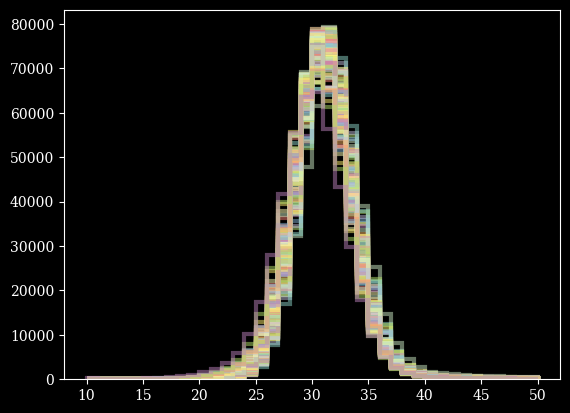

In [52]:
bins = np.arange(10, 50+1, 1)


skysig_data = np.zeros_like(data)

for xx in range(nx):
	for yy in range(ny):

		x1 = int(xstep*(xx+1))
		x0 = int(xstep*xx)
		y1 = int(ystep*(yy+1))
		y0 = int(ystep*yy)

		_data = data[y0:y1,x0:x1]
		skysig_data[y0:y1,x0:x1] = np.std(_data[(_data<50) & (_data>10)])

		plt.hist(data[y0:y1,x0:x1].flatten(), bins=bins, histtype='step', lw=3, alpha=0.5)


(array([  179.,   160.,   145.,   124.,   145.,   188.,   237.,   436.,
          666.,  1024.,  1560.,  2322.,  3571.,  5814., 10163., 17363.,
        28043., 41659., 55532., 63648., 64595., 56428., 43299., 29731.,
        17827.,  9731.,  4973.,  2475.,  1325.,   813.,   587.,   485.,
          385.,   328.,   301.,   252.,   201.,   240.,   170.,   159.]),
 array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.,
        23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35.,
        36., 37., 38., 39., 40., 41., 42., 43., 44., 45., 46., 47., 48.,
        49., 50.]),
 <BarContainer object of 40 artists>)

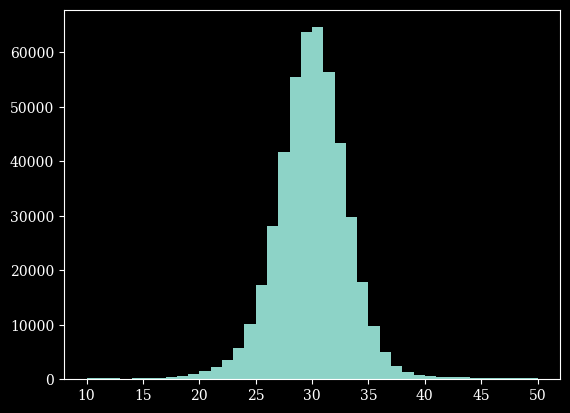

In [53]:
plt.hist(data[y0:y1,x0:x1].flatten(), bins=bins)


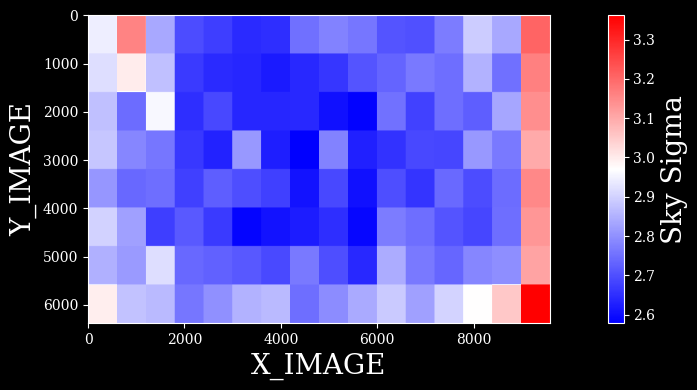

In [54]:
fig = plt.figure(figsize=(12, 4))
plt.imshow(skysig_data, cmap='bwr',)#, vmin=depth-0.2, vmax=depth+0.2)
cbar = plt.colorbar()
cbar.set_label('Sky Sigma')
plt.xlabel('X_IMAGE')
plt.ylabel('Y_IMAGE')
plt.tight_layout()